In [1]:
# That set-up stuff
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
%matplotlib inline

# Finite Differences

We can compute derivatives symbolically in Python using a package called Sympy. And use the forward and backward difference methods I showed in the lectures using a little bit of code. Here I compare them. You could test them by changing the function. 

In [6]:
from sympy import *
x,y = symbols('x,y')
init_printing(use_unicode=True)

In [8]:
s = diff(cos(x),x)
s.subs(x,0.5)

In [40]:
r1 = np.linspace(-np.pi,np.pi,num=100)
r2 = np.linspace(-np.pi,np.pi,num=20)

In [56]:
d1 = np.zeros(len(r1))
for i in range(len(r1)):
    d1[i] = s.subs(x,r1[i])
d2 = np.zeros(len(r2))
for i in range(len(r2)):
    d2[i] = s.subs(x,r2[i])

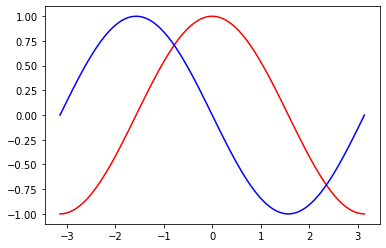

In [55]:
pl.plot(r,np.cos(r1),'r');
pl.plot(r1,d1,'b');

In [46]:
f1 = np.cos(r1)
spacing1 = 2*np.pi/100
dforward1 = (np.roll(f1,1)-f1)/spacing1
dbackward1 = (f1-np.roll(f1,-1))/spacing1

f2 = np.cos(r2)
spacing2 = 2*np.pi/20
dforward2 = (np.roll(f2,1)-f2)/spacing2
dbackward2 = (f2-np.roll(f2,-1))/spacing2

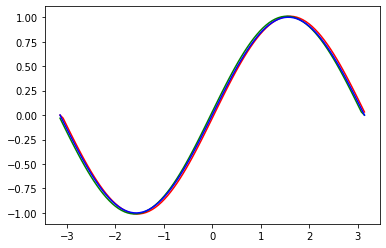

In [53]:
pl.plot(r1,dforward1,'r');
pl.plot(r1,dbackward1,'g');
pl.plot(r1,-d1,'b');

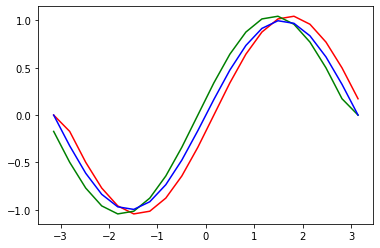

In [57]:
pl.plot(r2,dforward2,'r');
pl.plot(r2,dbackward2,'g');
pl.plot(r2,-d2,'b');

# Adam Algorithm
This is an implementation of the Adam algorithm from the lectures, and a simple demonstration of using it.

1.0000020311431854


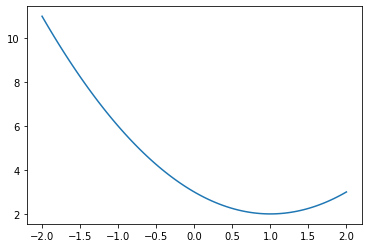

In [6]:
# Parameters
alpha = 0.01
beta_1 = 0.9
beta_2 = 0.999
epsilon = 1e-8

f = lambda x: x**2 - 2*x + 3

df = lambda x: 2*x - 2

# Initialisation
theta = 0
theta_old = 1
m = 0 
v = 0 
count = 0

# Loop until convergence
while np.abs(theta - theta_old) > epsilon:
    count += 1
    # Compute the derivative at current point
    g = df(theta)
    # Compute the moving averages of the terms
    m = beta_1*m + (1-beta_1)*g 
    v = beta_2*v + (1-beta_2)*(g**2)
    # Compute the bias-corrected gradient estimates
    mhat = m/(1-(beta_1**count))
    vhat = v/(1-(beta_2**count))
    # Store previous estimate
    theta_old = theta
    # Compute next estimate
    theta -= (alpha*mhat)/(np.sqrt(vhat)+epsilon)

print(theta)
x = np.linspace(-2,2,num=100)
pl.plot(x,f(x));

# Hyper-parameter Optimisation
You will explore the hyper-parameter optimisation in Scikit-learn more in the tutorial, but here is the syntax.

In [14]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import scipy.stats as stats

param_dist = {'average': [True, False],
              'l1_ratio': stats.uniform(0, 1),
              'alpha': stats.loguniform(1e-4, 1e0)}

random_search = RandomizedSearchCV(classifier, param_distributions=param_dist, n_iter=10)

param_grid = {'average': [True, False],
              'l1_ratio': np.linspace(0, 1, num=10),
              'alpha': np.power(10, np.arange(-4, 1, dtype=float))}

grid_search = GridSearchCV(classifier, param_grid=param_grid)

# K-Means Optimisation

The $k$-means optimisation algorithm is described in the lectures. Here is a basic implementation and animation of it working. There is a version in scikit-learn as well, in `sklearn.cluster.KMeans`

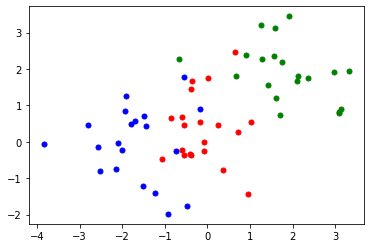

In [84]:
# Make some random data
d1 = np.random.randn(20,2)
d2 = np.random.randn(20,2)+np.array([2,2])
d3 = np.random.randn(20,2)+np.array([-1,0])

pl.plot(d1[:,0],d1[:,1],'r.',markersize=10);
pl.plot(d2[:,0],d2[:,1],'g.',markersize=10);
pl.plot(d3[:,0],d3[:,1],'b.',markersize=10);

d = np.vstack((d1,d2,d3))

In [85]:
# Initialise things
k=3
means = np.random.randn(k,2)
distances = np.zeros((k,np.shape(d)[0]))

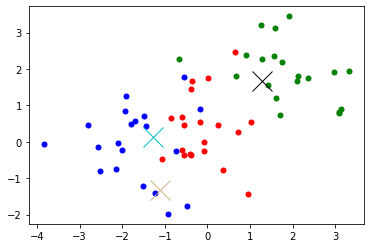

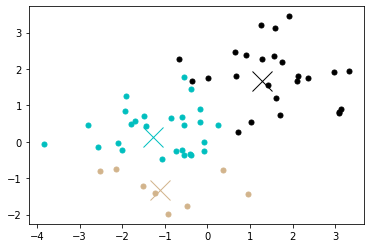

In [90]:
pl.plot(d1[:,0],d1[:,1],'r.',markersize=10);
pl.plot(d2[:,0],d2[:,1],'g.',markersize=10);
pl.plot(d3[:,0],d3[:,1],'b.',markersize=10);

pl.plot(means[0,0],means[0,1],'kx',markersize=20)
pl.plot(means[1,0],means[1,1],color='tan',marker='x',markersize=20)
pl.plot(means[2,0],means[2,1],'cx',markersize=20)

for j in range(k):
    distances[j,:] = np.sum((d-means[j,:])**2,axis=1)

# Identify the closest cluster
cluster = distances.argmin(axis=0)

pl.figure()
pl.plot(means[0,0],means[0,1],'kx',markersize=20)
pl.plot(means[1,0],means[1,1],color='tan',marker='x',markersize=20)
pl.plot(means[2,0],means[2,1],'cx',markersize=20)

thisCluster = np.where(cluster==0)
pl.plot(d[thisCluster,0],d[thisCluster,1],'k.',markersize=10);
thisCluster = np.where(cluster==1)
pl.plot(d[thisCluster,0],d[thisCluster,1],color='tan',marker='.',markersize=10);
thisCluster = np.where(cluster==2)
pl.plot(d[thisCluster,0],d[thisCluster,1],'c.',markersize=10);

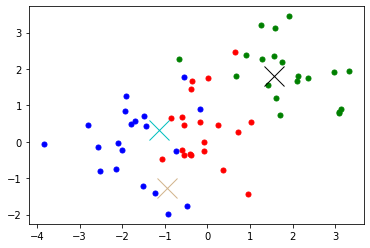

In [91]:
# Update the cluster centres    
for j in range(k):
    thisCluster = np.where(cluster==j)
    means[j,:] = np.sum(d[thisCluster,:],axis=1)
    means[j,:] /= np.shape(thisCluster)[1]

pl.plot(d1[:,0],d1[:,1],'r.',markersize=10);
pl.plot(d2[:,0],d2[:,1],'g.',markersize=10);
pl.plot(d3[:,0],d3[:,1],'b.',markersize=10);

pl.plot(means[0,0],means[0,1],'kx',markersize=20)
pl.plot(means[1,0],means[1,1],color='tan',marker='x',markersize=20)
pl.plot(means[2,0],means[2,1],'cx',markersize=20)
